In [ ]:
library(ggplot2)
library(dplyr)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




**Load data - refer to https://openmv.net/info/room-temperature for data description.**

In [ ]:
file = 'https://openmv.net/file/room-temperature.csv'
tempData = read.csv(file, header = TRUE)
## Print structure and head of data frame
str(tempData)
head(tempData, 10)

'data.frame':	144 obs. of  5 variables:
 $ Date      : chr  "4/11/2010 11:30" "4/11/2010 12:00" "4/11/2010 12:30" "4/11/2010 13:00" ...
 $ FrontLeft : num  295 296 297 296 297 ...
 $ FrontRight: num  297 296 298 297 296 ...
 $ BackLeft  : num  296 296 297 297 298 ...
 $ BackRight : num  296 296 297 297 297 ...


,Date,FrontLeft,FrontRight,BackLeft,BackRight
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
1,4/11/2010 11:30,295.2,297.0,295.8,296.3
2,4/11/2010 12:00,296.2,296.4,296.2,296.3
3,4/11/2010 12:30,297.3,297.5,296.7,297.1
4,4/11/2010 13:00,295.9,296.7,297.4,297.0
5,4/11/2010 13:30,297.2,296.5,297.6,297.4
6,4/11/2010 14:00,296.6,297.7,296.7,296.5
7,4/11/2010 14:30,297.5,297.6,297.5,298.2
8,4/11/2010 15:00,296.0,297.1,297.1,296.5
9,4/11/2010 15:30,297.7,298.1,297.6,297.6


**Question 1:** perform a PCA of the data matrix by filling the missing information below:

In [ ]:
# Calculate eigenvalues & eigenvectors of sample covariance matrix
e = eigen(cov(tempData %>% select(FrontLeft,FrontRight,BackLeft,BackRight)))

# Eigenvectors of the sample covariance matrix
View =e$vectors

# Eigenvalues of the sample covariance matrix
lambda = e$values

# Extract data matrix from data frame
X = as.matrix(tempData %>% select(-c(Date)))

# Print first sample
print(X[1, ])

# Print the first 3 eigenvectors or principal directions
print(View[, 1:3])

# Print the first 3 eigenvalues
print(lambda[1:3])

 FrontLeft FrontRight   BackLeft  BackRight 
     295.2      297.0      295.8      296.3 
           [,1]       [,2]        [,3]
[1,] -0.4939113  0.5020308  0.70984479
[2,] -0.5281787  0.4730418 -0.70076399
[3,] -0.4698086 -0.5407776  0.06702403
[4,] -0.5063188 -0.4814106 -0.02362183
[1] 8.3447126 1.8261400 0.4138214


**Question-2**: How much variance is explained by the first and second principal components?

In [ ]:
# Calculate the total sum of eigenvalues
total_variance = sum(lambda)

# Calculate the proportion of variance explained by the first and second principal components
variance_explained_pc1 = lambda[1] / total_variance
variance_explained_pc2 = lambda[2] / total_variance

# Print the results
print(paste("Variance explained by the first principal component:", variance_explained_pc1))
print(paste("Variance explained by the second principal component:", variance_explained_pc2))


[1] "Variance explained by the first principal component: 0.766885216671078"
[1] "Variance explained by the second principal component: 0.167823610741612"


**Question-3:** make a line plot of the PC-1 scores.

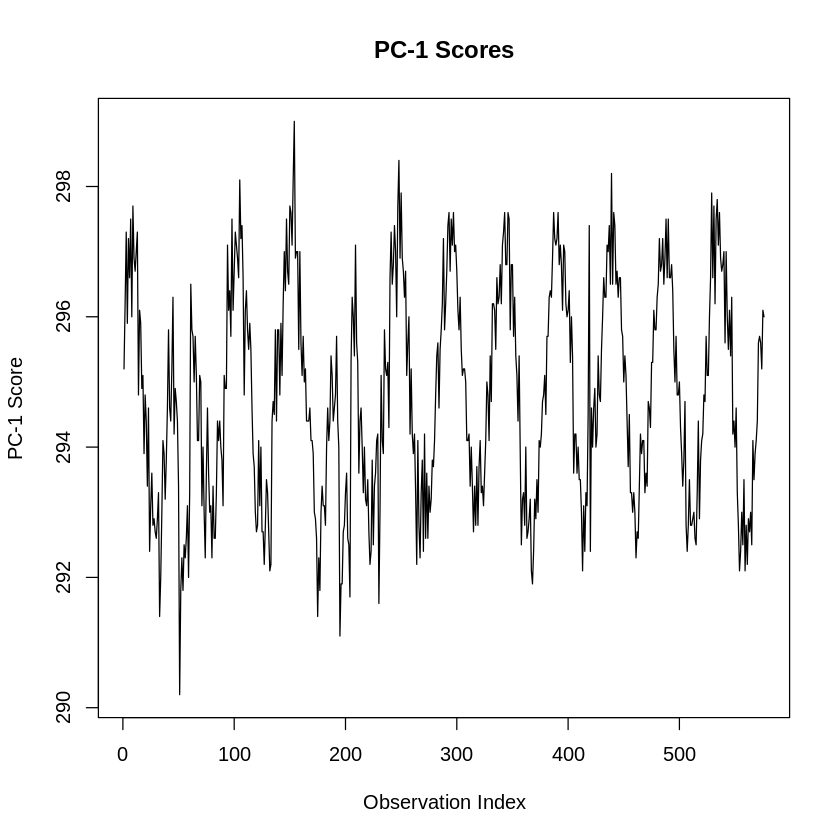

In [ ]:
# Assuming PC1_scores contains the principal component scores for PC1

# Create a sequence of observation indices
observation_indices <- seq(1, length(X))

# Plot PC1 scores
plot(observation_indices, X, type = "l",
     main = "PC-1 Scores", xlab = "Observation Index", ylab = "PC-1 Score")


**Question-4:** plot a bar plot of the loadings for the second principal component. Given this bar plot, what are the characteristics of an observation with a large, positive PC-2 score; and a large, negative PC-2 score?

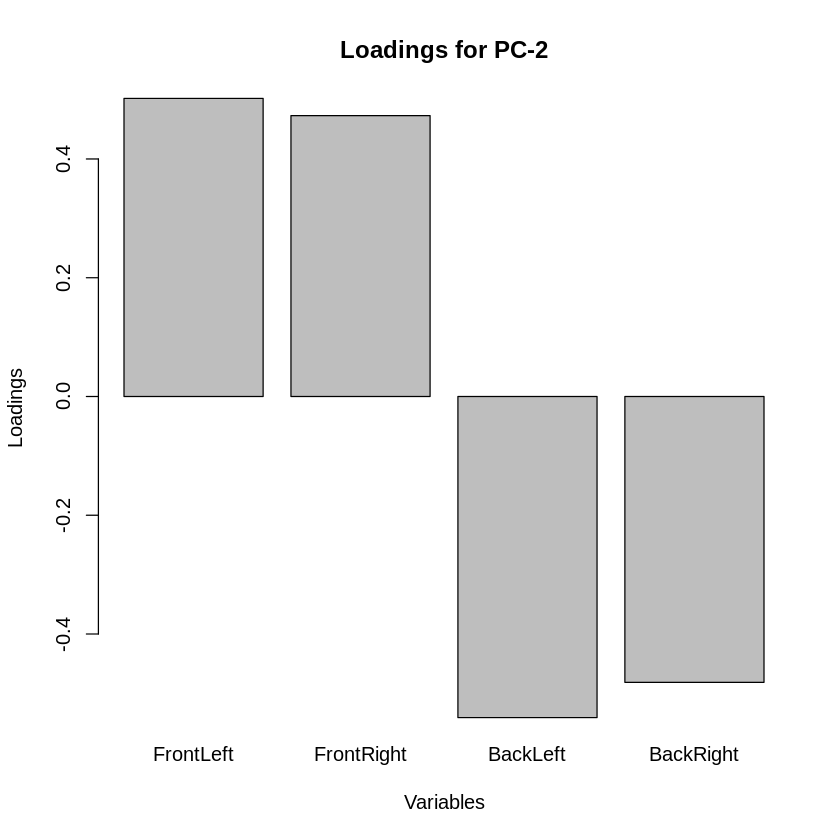

In [ ]:
loadings_pc2 <- View[, 2]

# Create a bar plot of loadings for PC-2
barplot(loadings_pc2, names.arg = colnames(X),
        main = "Loadings for PC-2", xlab = "Variables", ylab = "Loadings")

**Question-5:** make a scatter plot of PC-1 (x-axis) vs. PC-2 (y-axis) scores. Briefly explain how you can use this plot to detect outliers in the temperature measurements?

In [ ]:
# Assuming PC1_scores and PC2_scores contain the principal component scores for PC1 and PC2, respectively

# Create a scatter plot of PC-1 vs PC-2 scores
plot(PC1_scores, PC2_scores,
     main = "PC-1 vs PC-2 Scores",
     xlab = "PC-1 Scores", ylab = "PC-2 Scores")

# Add grid lines for reference
grid()

# Add a legend
legend("topright", legend = c("Observations"), pch = 1, col = 1)


ERROR: Error in eval(expr, envir, enclos): object 'PC1_scores' not found


In [ ]:
## Refer to this website http://archive.ics.uci.edu/ml/datasets/Auto+MPG
## for the data set that we will modify a bit in the next cell
autompg = read.table(
  "http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data",
  quote = "\"",
  comment.char = "",
  stringsAsFactors = FALSE)

**Question 6: print the structure of the unedited data set. How many samples and features are there?**

In [ ]:
?(?)

**Here we modify data set; just execute this cell and understand what is happening.**

In [ ]:
# Give the dataframe column names
colnames(autompg) = c("mpg", "cyl", "disp", "hp", "wt", "acc", "year", "origin", "name")

# Remove samples with missing horsepower (hp) values represented as "?"
autompg = autompg %>% filter(hp != '?')

# Remove samples with name "plymouth reliant"
autompg = autompg %>% filter(name != 'plymouth reliant')

# Give the dataframe row names in the form based on the engine, year and name
rownames(autompg) = paste(autompg$cyl, "cylinder", autompg$year, autompg$name)

# Select all features except "name"
autompg = autompg %>% select(-name)

# Change horsepower from character to numeric
autompg$hp = as.numeric(autompg$hp)

# Modify origin column to reflect local (1) and international models (0)
autompg = autompg %>% mutate(origin = ifelse(!(origin %in% c(2, 3)), 'local', 'international'))

# Filter samples with 3 and 5 cylinder cars (which are very rare)
autompg = autompg %>% filter(!(cyl %in% c(3, 5)))

# Change cyl and origin columns to factor types
catcols = c('cyl', 'origin')
autompg[catcols] = lapply(autompg[catcols], factor)

**Question 7: print the first 20 rows of the data frame.**

In [ ]:
?(?, n = ?)

**Question 8: print the structure of the modified data frame. How many samples and features are there? Which features are categorical?**

In [ ]:
?(autompg)

**Question 9: how many levels does the categorical variable *origin* have? What is the reference level?**

In [ ]:
?(?$?)

**Question 10: Create a scatter plot of mpg (y-axis) vs. number of cylinders (x-axis).**

In [ ]:
p1 = ggplot(data = ?, aes(x = ?, ? = ?)) +
  geom_?
p1

**Question 11: Create a scatter plot of mpg vs. displacement by color coding the points according to the number of cylinders.**

In [ ]:
p2 = ggplot(?, aes(? = ?, y = ?, color = factor(?))) +
  ?
p2

**Question 12: Create a scatter plot of mpg vs. displacement by color coding the points according to the origin (local or international).**

In [ ]:
p3 = ?
p3

**Question 13: fit a linear model for approximating *mpg* as a function of *displacement* and *origin*. Print the model's summary.**

In [ ]:
model = lm(data = ?, ? ~ ? + ?)
summary(?)

**Question 14: Extract the slope and intercept for estimating the mpg of local and international categories. It would be helpful to start with the regression equation $\hat{y}^{(i)} = \hat{\beta}_0 + \hat{\beta}_1x_1^{(i)} + \hat{\beta}_2x_2^{(i)}$ and then write two separate equations for local
 and international categories.**

In [ ]:
intercept_international = coef(model)[?] # you can also use the $ way of extracting coefficients
intercept_local = ?

slope_international = ?
slope_local = ?

**Question 15: to the scatter plot you created for mpg. vs displacement color coded using origin, add two separete regression lines for local and domestic cars.**

In [ ]:
p3 %+% geom_?(intercept = ?, slope = ?, color = 'red', size = 1, linetype = 1) +
   ?

**Question 16: Fit a linear model for mpg as a function of displacement and origin including an interaction effect between the predictors. Print the summary of the model.**

**Question 17: Extract the slope and intercept for estimating the mpg of local and international categories. It would be helpful to start with the regression equation $\hat{y}^{(i)} = \hat{\beta}_0 + \hat{\beta}_1x_1^{(i)} + \hat{\beta}_2x_2^{(i)} + \hat{\beta}_3x_3^{(i)}$ and then write two separate equations for local and international categories. In this equation, $x_3^{(i)}$ is the interaction effect variable.**

**Question 18: Create a scatter plot of mpg vs. displacement by color coding the points according to the origin (domestic or international), and add separate regression lines for international and local cars.**

In [ ]:
p4 = ggplot(data = autompg, aes(?, ?, color = ?)) +
  geom_? +
  ? +
  ?
p4

**Question 19: Fit a linear model for mpg as a function of *displacement* and *hp*. Print the model's summary.**

**Question 20: predict the mpg of a car with displacement = 375 and hp = 175.**

In [ ]:
newautompg = data.frame(? = c(375), hp = c(?))
?(?, ?)

**Question 21: Fit a linear model for *mpg* as a function of *displacement* and *hp* including an interaction term between the predictors. Print the model's summary.**

**Question 22**: using the interaction model, predict the mpg of a car with displacement = 375 and hp = 175.

**Question 23**: Using both non-interaction and interaction models, predict the mpg of a car with displacement = 400, hp = 250.

In [ ]:
newautompg = ?
predict(?, ?)
predict(?, ?)